# Setup Environment

## Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os
from image import *
from CNN import *
from ViT import *
import util
%load_ext autoreload
%autoreload 2

## Show NVIDIA GPU

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-a834fce4-9456-6c32-43bc-8d8574de0b1f)
GPU 1: NVIDIA H200 (UUID: GPU-26c37805-c5e1-6c9a-107d-4c5cc0c8dcbb)


## Setup utility

In [3]:
util.setup_logger()

# Load and Process Dataset

## Load Dataset

In [4]:
# folder_path = "../kaggle/input/ai-vs-human-generated-dateset/"
folder_path = os.path.join(os.getenv("HOME"), "scratch")
test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False, model="ViT")
test_dataset.check()

There are 0 missing values
3998 images with label 0, and 3997 with label 1.
All filenames end with .jpg


## (Optional) Show images

Label: 0, shape: torch.Size([3, 512, 768])


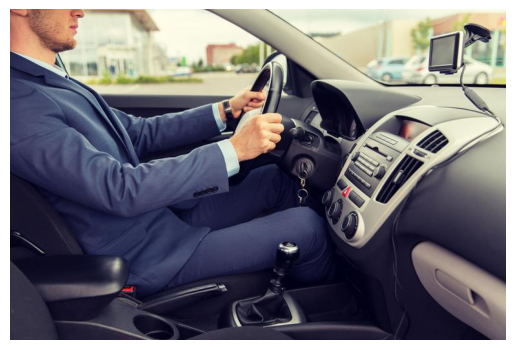

Label: 1, shape: torch.Size([3, 512, 768])


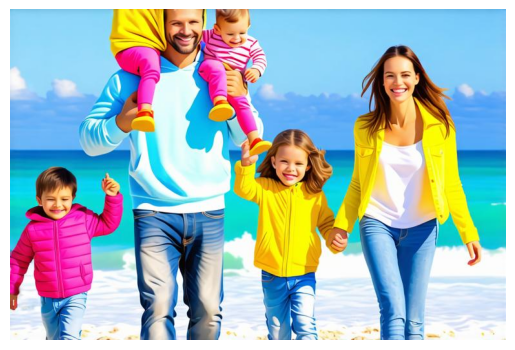

In [6]:
test_dataset.show_image(transform=False)

## (Optional) Show images after transformation

In [7]:
# dataset.show_image(transform=True)

# CNN Model

## Create Torch Data Loaders

In [5]:
batch_size = 1
test_loader  = test_dataset.get_loader(batch_size=batch_size)

## Check CUDA Availability

In [6]:
# "cuda" only when GPUs are available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Testing the Model

## Load the model

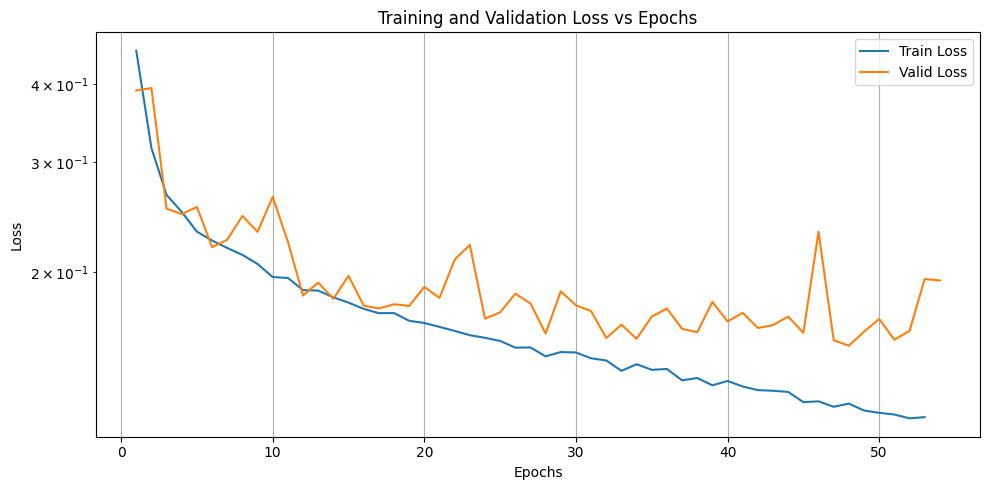

In [7]:
model, train_losses, valid_losses = load_model_ViT("ViT_test_best.ckpt", "ViT_test_loss.pkl")
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
plot_losses(train_losses, valid_losses)

## Evaluation

100%|██████████| 7995/7995 [02:54<00:00, 45.85it/s]


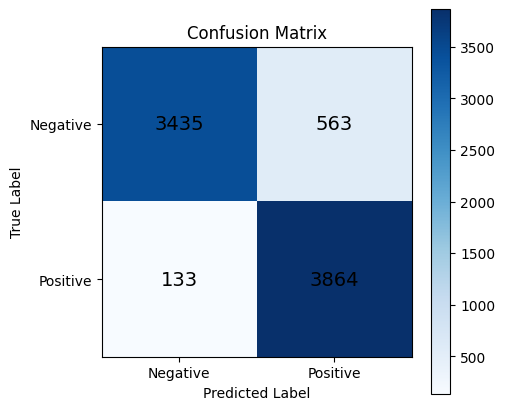

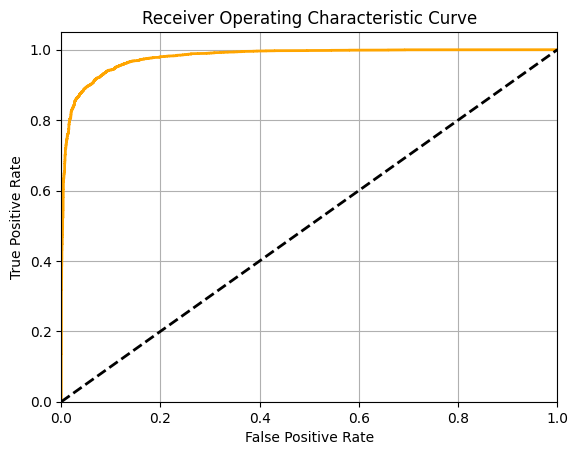

Test Accuracy: 0.9129
F1 Score: 0.9174
F2 Score: 0.9464
AUC: 0.9796


(np.float64(0.9129455909943714),
 np.float64(0.9173789173789173),
 np.float64(0.9463629684055841),
 np.float64(0.9795742254414672))

In [8]:
evaluate_model_ViT(model, test_loader, feature_extractor)